In [14]:
import tsplib95
import matplotlib.pyplot as plt
import networkx as nx
import importlib
imported_module = importlib.import_module("tsp_genetic_algorithm")
importlib.reload(imported_module)
from tsp_genetic_algorithm import TSP

# Load the original TSP problem
original_problem = tsplib95.load('att48.tsp')



In [15]:
# Extract node coordinates for the first 5 cities
reduced_nodes = {key: original_problem.node_coords[key] for key in list(original_problem.get_nodes())[:5]}

# Create a new TSP problem with only 5 cities
reduced_problem = tsplib95.models.StandardProblem(comment="Reduced TSP to 5 cities")
reduced_problem.node_coords = reduced_nodes

tsp = TSP(reduced_problem, 4, 100, 0.01, 0.9)
tsp.run()

[6.35602493964378e-05, 7.57621488043312e-05, 4.851932355310978e-05, 7.2057633964167e-05]


TypeError: 'float' object cannot be interpreted as an integer

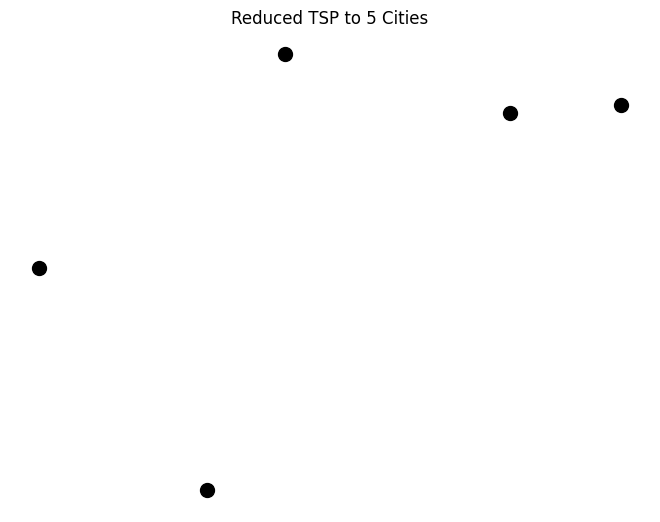

In [16]:


# Create a graph and add nodes
G = nx.Graph()
G.add_nodes_from(reduced_nodes.keys())

# Draw the nodes without edges
pos = {node: (reduced_nodes[node][0], reduced_nodes[node][1]) for node in reduced_nodes}
nx.draw(G, pos, node_color='black', with_labels=False, node_size=100)
plt.title('Reduced TSP to 5 Cities')
plt.show()
